## Final Project Submission

Please fill out:
* Student name: JAMES IRUNGU NDIRITU
* Student pace: Part time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Datasets used for this project :
    1.bom.movie_gross.csv
    2.title.basics.csv
    3.title.ratings.csv

import libraries

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sns
%matplotlib inline

Loading data from csv datafiles

In [3]:
# use pandas to open the file located at OlderzippedDataset/bom.movie_gross.csv
movie_gross=pd.read_csv("OlderzippedDataset/bom.movie_gross.csv")
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
## use pandas to open the file located at OlderzippedDataset/title.basics.csv
#title_basics=pd.read_csv("OlderzippedDataset/title.basics.csv",index_col=0)
title_basics=pd.read_csv("OlderzippedDataset/title.basics.csv")
title_basics.head()
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
# use pandas to open the file located at OlderzippedDataset/title.ratings.csv
#title_rating=pd.read_csv("OlderzippedDataset/title.ratings.csv",index_col=0)
title_rating=pd.read_csv("OlderzippedDataset/title.ratings.csv")
title_rating.head()
title_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


UNDERSTANDING OF THE DATA 

In [176]:
# Check that there are the correct number of rows
movie_gross.shape[0] 

3387

In [177]:
# Check that there are the correct number of rows
title_basics.shape[0] 

146144

In [178]:
# Check that there are the correct number of rows
title_rating.shape[0]

73856

In [179]:
#summary statistics of title_basics
title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [180]:
#summary statistics of title_basics
movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [181]:
#summary statistics of title_basics
title_rating.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [182]:
#Checking column datatypes
title_rating.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

In [183]:
#Checking column datatypes
movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [184]:
#Checking column datatypes
title_basics.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

DATA CLEANSING

Removing Special Characters

In [6]:
#Remove special characters on movie_gross['foreign_gross']
def RemoveChars(data, cols, chars):
    for col in cols:
        data[col] = data[col].str.strip(chars)
        return data.head()

RemoveChars(movie_gross, [ 'foreign_gross'], ',')

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
movie_gross['foreign_gross'].replace(',','',inplace=True,regex=True)

In [187]:
movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [8]:
#replace the missing values of foreign_gross and domestic_gross with 0.
movie_gross['domestic_gross'] = movie_gross.domestic_gross.fillna(0.0)  
movie_gross['foreign_gross']  = movie_gross.foreign_gross.fillna(0.0) 

#replace missing values of studio with 'Unknown'
movie_gross['studio'] = movie_gross.studio.fillna('Unknown')

Correcting Data Types

In [9]:
# Function CorrectDataType to correct wrong data types
#Changing foreign_gross : object to float
def CorrectDataType(data, cols, dtype):
    for col in cols:
        data[col] = data[col].astype(dtype)
        return data.head()

CorrectDataType(movie_gross, [ 'foreign_gross'], 'float')
movie_gross.dtypes


title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

Check and Removal of Duplicated Values

In [10]:
#Duplicated values
#title_basics[title_basics.duplicated(keep=False, subset=['primary_title','start_year'])].sort_values(by='start_year')
title_basics[title_basics.duplicated(keep=False, subset=['primary_title','genres','start_year'])].sort_values(by=['primary_title','genres','start_year'])[61:90]


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
27180,tt2073540,Body Temperature,Taion,2011,72.0,"Drama,Romance"
33733,tt2256629,Body Temperature,Body Temperature,2011,72.0,"Drama,Romance"
43097,tt2571140,Boss,Boss,2013,143.0,Action
63878,tt3667436,Boss,Boss,2013,140.0,Action
97412,tt5686062,Boundaries,Boundaries,2018,104.0,"Comedy,Drama"
140086,tt9071040,Boundaries,Boundaries,2018,100.0,"Comedy,Drama"
10360,tt1595347,Boundaries,Barriere,2010,96.0,NaN
34733,tt2284202,Boundaries,Boundaries,2010,NaN,NaN
49679,tt2951482,Breaking Point,Breaking Point,2013,NaN,Drama
51968,tt3081480,Breaking Point,Breaking Point,2013,NaN,Drama


In [11]:
title_basics_NoDups=title_basics.copy()

Renaming Columns names for easier joining.

In [12]:
#Rename primary_title in dataframe merge_rating_basic to title in order to join
title_basics_NoDups.rename(columns={'primary_title':'title'}, inplace=True)
title_basics_NoDups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   title            146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [13]:
#Rename primary_title in dataframe merge_rating_basic to title in order to join
title_basics.rename(columns={'start_year':'year'}, inplace=True)
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   year             146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [14]:
title_rating[title_rating.duplicated(keep=False, subset=['tconst'])]

,tconst,averagerating,numvotes


No duplicates

Missing Data(Identification of NULL VALUES)

In [195]:
#Getting Null values
#title_basics.loc[title_basics['primary_title'].isna()]
display(title_basics_NoDups.isnull().sum())

tconst                 0
title                  0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [196]:
display(title_rating.isnull().sum())

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [197]:
display(movie_gross.isnull().sum())

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

MERGING DATAFRAMES

Merging  title_basics_NoDups And title_rating

In [15]:
merge_rating_basic = pd.merge(title_basics_NoDups,title_rating,on=["tconst"],how="inner")
merge_rating_basic.info()
merge_rating_basic.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   title            73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


(73856, 8)

In [199]:
movie_gross.shape
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Merging  movie_gross and  title_basics_NoDups And title_rating

In [16]:
movie_gross['domestic_gross'] = movie_gross.domestic_gross.fillna(0.0)  
movie_gross['foreign_gross']  = movie_gross.foreign_gross.fillna(0.0) 

#replace missing values of studio with 'Unknown'
movie_gross['studio'] = movie_gross.studio.fillna('Unknown')

In [203]:
display(movie_gross.isnull().sum())

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [17]:
All_Datasets = pd.merge(merge_rating_basic,movie_gross,on=["title"],how="inner")
All_Datasets.shape

(3027, 12)

In [205]:
display(All_Datasets)

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,0.0,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000.0,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,FM,300.0,0.0,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000.0,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,0.0,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,0.0,2018


Calculate total income Earned ( demestic and Foreigne).We can create another column to demostrate this.

In [18]:
All_Datasets['TotalGross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross'] 
display(All_Datasets)

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,TotalGross
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,0.0,2016,1.067000e+09
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,2012,1.025500e+09
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,2012,9.603000e+08
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000.0,2012,8.283000e+08
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,2013,7.526000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,FM,300.0,0.0,2015,1.250000e+05
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000.0,2018,1.230000e+05
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,0.0,2018,1.130000e+05
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,0.0,2018,1.130000e+05


To make visualization and drawing of insights easier,I am going to split genres column to push each genre to a new row.

In [19]:
AllDatasetsWithSpliGenres = All_Datasets.copy()

In [20]:
#split the genre categories into a list, around the comma separator
AllDatasetsWithSpliGenres['genres'] = AllDatasetsWithSpliGenres['genres'].str.split(',')
#transform each element in the genres list to a row
AllDatasetsWithSpliGenres = AllDatasetsWithSpliGenres.explode('genres')

In [209]:
display(AllDatasetsWithSpliGenres)

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,TotalGross
0,tt0315642,Wazir,Wazir,2016,103.0,Action,7.1,15378,Relbig.,1100000.0,0.0,2016,1.067000e+09
0,tt0315642,Wazir,Wazir,2016,103.0,Crime,7.1,15378,Relbig.,1100000.0,0.0,2016,1.067000e+09
0,tt0315642,Wazir,Wazir,2016,103.0,Drama,7.1,15378,Relbig.,1100000.0,0.0,2016,1.067000e+09
1,tt0337692,On the Road,On the Road,2012,124.0,Adventure,6.1,37886,IFC,744000.0,8000000.0,2012,1.025500e+09
1,tt0337692,On the Road,On the Road,2012,124.0,Drama,6.1,37886,IFC,744000.0,8000000.0,2012,1.025500e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,0.0,2018,1.130000e+05
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,Drama,6.4,322,CL,181000.0,0.0,2018,1.130000e+05
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,Romance,6.4,322,CL,181000.0,0.0,2018,1.130000e+05
3026,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,Documentary,8.8,2067,Trafalgar,4200000.0,16100000.0,2018,1.070000e+05


In [21]:
#Reset Index
AllDatasetsWithSpliGenres=AllDatasetsWithSpliGenres.reset_index(drop=True)

In [22]:
#value count of column genre
AllDatasetsWithSpliGenres['genres'].value_counts()

genres
Drama          1756
Comedy          926
Action          646
Romance         468
Thriller        453
Adventure       439
Crime           382
Biography       285
Horror          240
Documentary     227
Mystery         207
Fantasy         170
Animation       152
History         136
Sci-Fi          135
Family          117
Music            92
Sport            53
War              51
Western          21
Musical          18
News              4
Name: count, dtype: int64

Pie Chart showing count per genre

([<matplotlib.patches.Wedge at 0x2ad28bd3710>,
 [Text(1.1606698930387407, 1.1727512095041466, 'Drama'),
  Text(-0.6837143305201351, 1.5016773003017005, 'Comedy'),
  Text(-1.4957739251142805, 0.6965345396663537, 'Action'),
  Text(-1.646436790501251, -0.10837847980083562, 'Romance'),
  Text(-1.4632533010632884, -0.7624891979086588, 'Thriller'),
  Text(-1.0487932295330893, -1.2737867803072669, 'Adventure'),
  Text(-0.5177842077979249, -1.5666523271469888, 'Crime'),
  Text(-0.031197894738016898, -1.649705031623507, 'Biography'),
  Text(0.355977041574265, -1.6111425591399522, 'Horror'),
  Text(0.684390375441313, -1.5013693129950736, 'Documentary'),
  Text(0.9628611538341009, -1.3399247734247113, 'Mystery'),
  Text(1.1753610236059842, -1.1580269704060842, 'Fantasy'),
  Text(1.3303224293072922, -0.9760851571876017, 'Animation'),
  Text(1.4453617511864212, -0.7958827854698972, 'History'),
  Text(1.5314806103234189, -0.61405792902902, 'Sci-Fi'),
  Text(1.5911526414222248, -0.4367302046974506, '

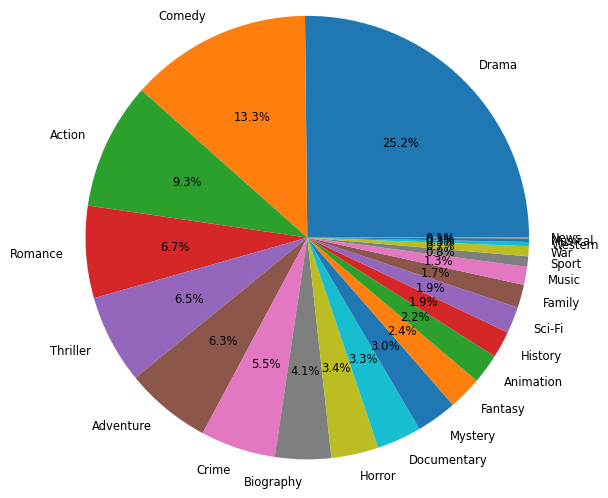

In [32]:
labels='Drama','Comedy','Action','Romance','Thriller','Adventure','Crime','Biography','Horror','Documentary','Mystery','Fantasy','Animation','History','Sci-Fi','Family','Music','Sport','War','Western','Musical','News'
fig, ax = mpl.subplots()
ax.pie(AllDatasetsWithSpliGenres['genres'].value_counts(),labels=labels, textprops={'size': 'smaller'}, radius=1.5, autopct='%1.1f%%')

Drama has the highest number of movies

CLASSIFICATION OF MOVIES(Per Genre)

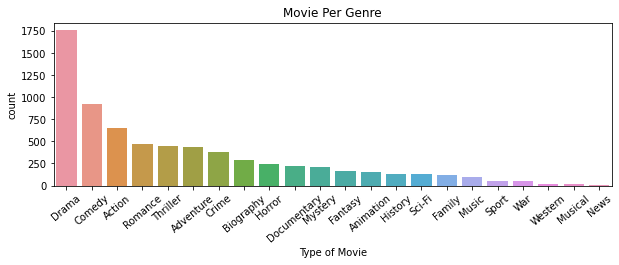

In [226]:
fig, xy = mpl.subplots(figsize=(10,3))
xy = sns.countplot(x=AllDatasetsWithSpliGenres['genres'], order=AllDatasetsWithSpliGenres['genres'].value_counts().index)
xy.set_title('Movie Per Genre')
xy.set_xlabel('Type of Movie')
mpl.xticks(rotation=40);

It's clear that drama and comedy genres have the highest number of movies released during this period.News,musical and western genres had the least release.

TYPES OF MOVIES WITH THE HIGHEST RATING

In [231]:
AVGRatingPerGenre = AllDatasetsWithSpliGenres.groupby('genres')['averagerating'].mean().sort_values(ascending = False)
AVGRatingPerGenre.head()

genres
Documentary    7.292511
News           7.100000
Biography      6.973333
History        6.878676
Sport          6.867925
Name: averagerating, dtype: float64

In [ ]:
 A Bar Graph to illustrate Rating per Genre.

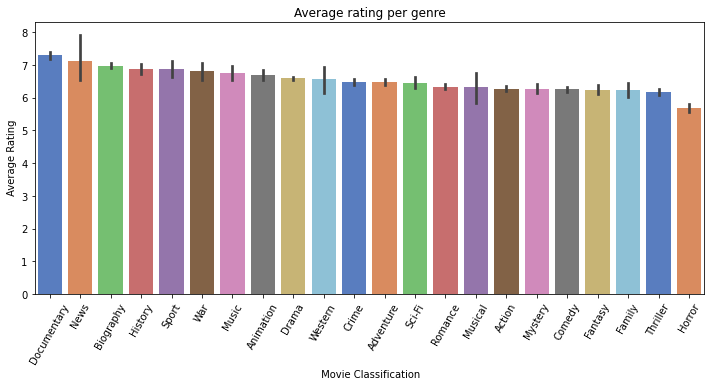

In [257]:
fig, ax =mpl.subplots(figsize=(12,5))
order_by = AllDatasetsWithSpliGenres.groupby('genres')['averagerating'].mean().sort_values(ascending=False).index
sns.barplot(data=AllDatasetsWithSpliGenres, x='genres', y= 'averagerating', palette='muted', order=order_by)
ax.set_title('Average rating per genre')
ax.set_ylabel(' Average Rating')
ax.set_xlabel(' Movie Classification')
mpl.xticks(rotation=60);

There is no big difference between the highest rated genre and the least.
Documentary & News genre have the highest rating.On the other side horror and Thriller are rated least.

Gross Income Per Genre

In [252]:
TotalAverageGrossPerGenre = AllDatasetsWithSpliGenres.groupby('genres')['TotalGross'].mean().sort_values(ascending = False)
TotalAverageGrossPerGenre.head()

genres
News         9.082050e+07
Fantasy      8.571081e+07
Musical      8.235541e+07
Animation    8.164720e+07
Adventure    8.070947e+07
Name: TotalGross, dtype: float64

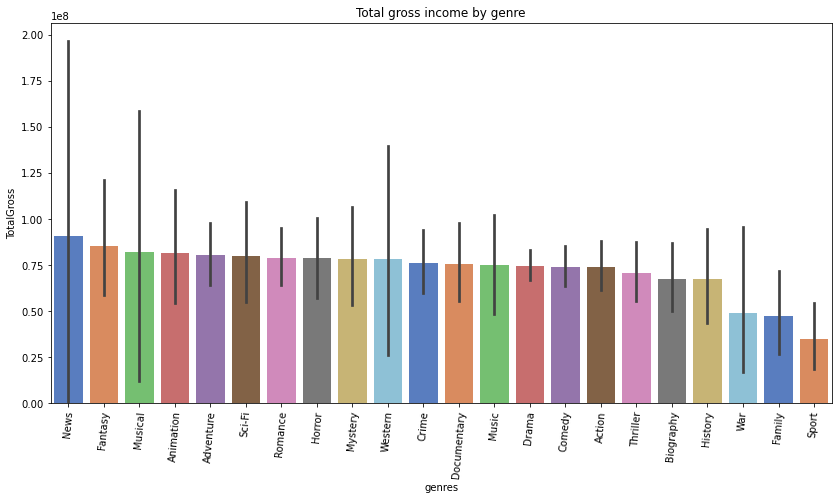

In [258]:
fig, ax =mpl.subplots(figsize=(14,7))
order_by = AllDatasetsWithSpliGenres.groupby('genres')['TotalGross'].mean().sort_values(ascending=False).index
sns.barplot(data=AllDatasetsWithSpliGenres, x='genres', y= 'TotalGross', palette='muted', order=order_by, ax=ax)
ax.set_title('Total gross income by genre')
mpl.xticks(rotation=85);

News,fantasy,animations seems to earn higher income compared to others.
war,family and sport have the least gross income.

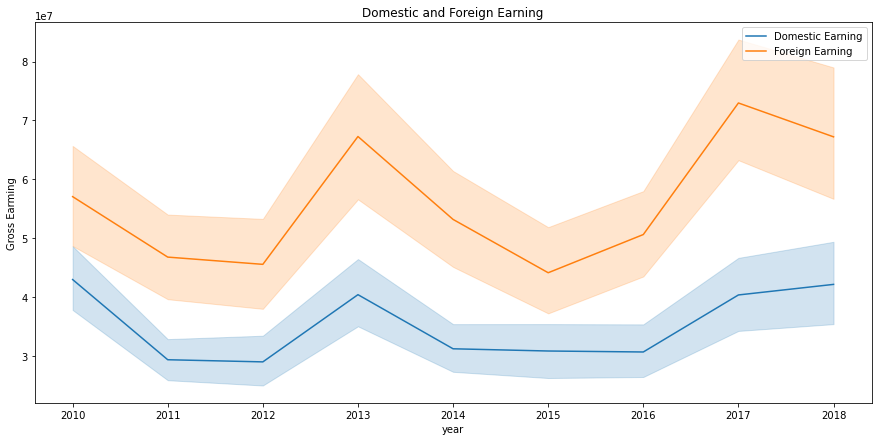

In [267]:
#All_Datasets['TotalGross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gros
#lineplot showing the domestic gross and foreign gross income by start year
fig, ax =mpl.subplots(figsize=(15,7))
sns.lineplot(data=AllDatasetsWithSpliGenres, x='year', y='domestic_gross', ax=ax, label='Domestic Earning')
sns.lineplot(data=AllDatasetsWithSpliGenres, x='year', y='foreign_gross', ax=ax, label='Foreign Earning')
ax.set_title('Domestic and Foreign Earning')
ax.set_ylabel('Gross Earming');

Regardless of the genre,foreign earnings are higher compared to domestic income.

In [ ]:
CONCLUSION AND SUGGESTIONS

In [ ]:
1.Documentary & News genres have the highest rating.On the other side horror and Thriller are rated least.
2.News,fantasy,animations seems to earn higher income compared to others.War,family and sport have the least gross income.
3.Income from domestic sales is less compared to foreign sales.
4.High rating movies earns more than less rated movies
5.Microsoft should consider News,fantasy and animation movies as the highest earners.
6.Microsoft should focus more on foreign market inorder to maximis